In [2]:
import numpy as np
import pylab as pl
from sklearn import svm



In [7]:
# we create 40 separable points
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0]*20 +[1]*20
X


array([[  1.84241264e-01,  -1.62468599e+00],
       [ -2.46270847e+00,  -2.75372698e+00],
       [ -1.19365391e+00,  -3.10565455e+00],
       [ -7.83462792e-01,  -1.65927102e+00],
       [ -3.99104836e+00,  -2.29084636e+00],
       [ -1.83846169e+00,  -4.80853553e+00],
       [ -1.66702250e+00,  -1.59151423e+00],
       [ -3.36794530e+00,  -2.17755796e-03],
       [ -2.48779953e+00,  -2.45040092e+00],
       [ -1.27970850e+00,  -2.77049509e+00],
       [ -2.90683340e+00,  -2.57364879e+00],
       [ -2.44400537e+00,  -3.87106254e+00],
       [ -3.30203409e+00,  -2.65999756e-02],
       [ -9.13782972e-01,  -1.53553796e+00],
       [ -1.74925421e+00,  -2.54927045e+00],
       [ -1.30727395e+00,  -2.78266111e+00],
       [ -3.97909773e+00,  -2.81763530e+00],
       [ -1.43521477e+00,  -3.30826870e+00],
       [ -2.05063052e+00,  -2.17559196e+00],
       [ -7.19218654e-01,  -1.71645332e+00],
       [  2.58379381e+00,   9.18352814e-01],
       [  1.40905227e+00,   1.74898186e+00],
       [  

In [9]:
Y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [10]:
#fit the model
clf = svm.SVC(kernel='linear')
clf.fit(X, Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0]/w[1]
xx = np.linspace(-5, 5)
yy = a*xx - (clf.intercept_[0])/w[1]

# plot the parallels to the separating hyperplane that pass through the support vectors
b = clf.support_vectors_[0]
yy_down = a*xx + (b[1] - a*b[0])
b = clf.support_vectors_[-1]
yy_up = a*xx + (b[1] - a*b[0])

print(clf.intercept_[0])

0.235902882389


In [26]:
print ('w:',w)
print ("a: ", a)
print ("xx: ", xx)
print ("yy: ", yy)
print ("support_vectors_: ", clf.support_vectors_)
print ("clf.coef_: ", clf.coef_)



w: [ 0.36784644  0.80246869]
a:  -0.458393505511
xx:  [-5.         -4.79591837 -4.59183673 -4.3877551  -4.18367347 -3.97959184
 -3.7755102  -3.57142857 -3.36734694 -3.16326531 -2.95918367 -2.75510204
 -2.55102041 -2.34693878 -2.14285714 -1.93877551 -1.73469388 -1.53061224
 -1.32653061 -1.12244898 -0.91836735 -0.71428571 -0.51020408 -0.30612245
 -0.10204082  0.10204082  0.30612245  0.51020408  0.71428571  0.91836735
  1.12244898  1.32653061  1.53061224  1.73469388  1.93877551  2.14285714
  2.34693878  2.55102041  2.75510204  2.95918367  3.16326531  3.36734694
  3.57142857  3.7755102   3.97959184  4.18367347  4.3877551   4.59183673
  4.79591837  5.        ]
yy:  [ 1.99799608  1.90444639  1.81089669  1.717347    1.6237973   1.53024761
  1.43669791  1.34314822  1.24959852  1.15604883  1.06249913  0.96894944
  0.87539974  0.78185005  0.68830035  0.59475066  0.50120096  0.40765127
  0.31410157  0.22055188  0.12700218  0.03345249 -0.06009721 -0.1536469
 -0.2471966  -0.34074629 -0.43429599 -0.

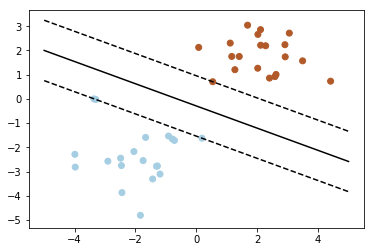

In [18]:
# switching to the generic n-dimensional parameterization of the hyperplan to the 2D-specific equation
# of a line y=a.x +b: the generic w_0x + w_1y +w_3=0 can be rewritten y = -(w_0/w_1) x + (w_3/w_1)


# plot the line, the points, and the nearest vectors to the plane
pl.plot(xx, yy, 'k-')
pl.plot(xx, yy_down, 'k--')
pl.plot(xx, yy_up, 'k--')

pl.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
          s=80, facecolors='none')
pl.scatter(X[:, 0], X[:, 1], c=Y, cmap=pl.cm.Paired)

pl.axis('tight')
pl.show()